In [1]:
path="data/dataset/bitly_usagov/example.txt"
# data=open(path).readline()
data=open(path,encoding='UTF8').readlines()
len(data) # 라인이 3560

# json 포맷 읽기

import json
records=[json.loads(line) for line in open(path,encoding='UTF8')]

len(records)

records

[{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
  'c': 'US',
  'nk': 1,
  'tz': 'America/New_York',
  'gr': 'MA',
  'g': 'A6qOVH',
  'h': 'wfLQtf',
  'l': 'orofrog',
  'al': 'en-US,en;q=0.8',
  'hh': '1.usa.gov',
  'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
  'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
  't': 1331923247,
  'hc': 1331822918,
  'cy': 'Danvers',
  'll': [42.576698, -70.954903]},
 {'a': 'GoogleMaps/RochesterNY',
  'c': 'US',
  'nk': 0,
  'tz': 'America/Denver',
  'gr': 'UT',
  'g': 'mwszkS',
  'h': 'mwszkS',
  'l': 'bitly',
  'hh': 'j.mp',
  'r': 'http://www.AwareMap.com/',
  'u': 'http://www.monroecounty.gov/etc/911/rss.php',
  't': 1331923249,
  'hc': 1308262393,
  'cy': 'Provo',
  'll': [40.218102, -111.613297]},
 {'a': 'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0

In [9]:
records[0]['tz']

'America/New_York'

In [13]:
time_zones=[rec['tz']for rec in records if 'tz'in rec] # 모든 tz 컬럼의 값들을 리스트 컴프리핸션으로 저장
time_zones[:10] # 상위 10개 출력
len(time_zones) # 3440(전체 3560개 중 120개정도는 tz 컬럼이 없다)

3440

In [30]:
# [방법 1]
from collections import defaultdict
def get_counts2(sequence):
    counts=defaultdict(int) # 값이 0으로 초기화 됨, 정수의 딕셔너리 카운트를 만들어라!
    for x in sequence:
        counts[x]+=1
    return counts

# [방법 2]
def get_counts(sequence):
    counts={}
    for x in sequence: # x='America/New_York'
        if x in counts: # 'America/New_York'이 없다면
            counts[x]+=1
    else:
        counts[x]=1
    return counts

counts=get_counts2(time_zones)
# time_zones
print(counts)

#  -> 동일한 도시명이 몇개 있는지 카운트

defaultdict(<class 'int'>, {'America/New_York': 1251, 'America/Denver': 191, 'America/Sao_Paulo': 33, 'Europe/Warsaw': 16, '': 521, 'America/Los_Angeles': 382, 'Asia/Hong_Kong': 10, 'Europe/Rome': 27, 'Africa/Ceuta': 2, 'Europe/Madrid': 35, 'Asia/Kuala_Lumpur': 3, 'Asia/Nicosia': 1, 'Europe/London': 74, 'Pacific/Honolulu': 36, 'America/Chicago': 400, 'Europe/Malta': 2, 'Europe/Lisbon': 8, 'Europe/Paris': 14, 'Europe/Copenhagen': 5, 'America/Mazatlan': 1, 'Europe/Dublin': 3, 'Europe/Brussels': 4, 'America/Vancouver': 12, 'Europe/Amsterdam': 22, 'Europe/Prague': 10, 'Europe/Stockholm': 14, 'America/Anchorage': 5, 'Asia/Bangkok': 6, 'Europe/Berlin': 28, 'America/Rainy_River': 25, 'Europe/Budapest': 5, 'Asia/Tokyo': 37, 'Europe/Vienna': 6, 'America/Phoenix': 20, 'Asia/Jerusalem': 3, 'Asia/Karachi': 3, 'America/Bogota': 3, 'America/Indianapolis': 20, 'America/Montreal': 9, 'Asia/Calcutta': 9, 'Europe/Skopje': 1, 'Asia/Beirut': 4, 'Australia/NSW': 6, 'Chile/Continental': 6, 'America/Halifax'

In [31]:
# 잘 가는 상위 10개 도시 출력
counts['America/New_York']

def top_counts(count_dict,n=10): # 상위 열개를 가지고 오는 코드 구현, n=10은 기본적으로 상위 10개 도시를 추출하겠다는 의미
    vkp=[(count,tz) for tz, count in count_dict.items()] # 앞에는 카운트, 뒤에는 도시 이름 구조
    vkp.sort() # 정렬해보기(오름차순 정렬)
    print(vkp[-n:]) # 뒤에서 부터 열 개 출력

top_counts(counts)

[(33, 'America/Sao_Paulo'), (35, 'Europe/Madrid'), (36, 'Pacific/Honolulu'), (37, 'Asia/Tokyo'), (74, 'Europe/London'), (191, 'America/Denver'), (382, 'America/Los_Angeles'), (400, 'America/Chicago'), (521, ''), (1251, 'America/New_York')]


In [35]:
from collections import Counter
counts=Counter(time_zones)
counts.most_common(10) # 상위 10개 추출

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [38]:
from pandas import DataFrame, Series
import pandas as pd
frame=DataFrame(records)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


In [40]:
# tz 컬럼 추출
frame['tz']

# 빈칸과 NaN이 섞여있음

0          America/New_York
1            America/Denver
2          America/New_York
3         America/Sao_Paulo
4          America/New_York
5          America/New_York
6             Europe/Warsaw
7                          
8                          
9                          
10      America/Los_Angeles
11         America/New_York
12         America/New_York
13                      NaN
14         America/New_York
15           Asia/Hong_Kong
16           Asia/Hong_Kong
17         America/New_York
18           America/Denver
19              Europe/Rome
20             Africa/Ceuta
21         America/New_York
22         America/New_York
23         America/New_York
24            Europe/Madrid
25        Asia/Kuala_Lumpur
26             Asia/Nicosia
27        America/Sao_Paulo
28                         
29                         
               ...         
3530    America/Los_Angeles
3531                       
3532       America/New_York
3533       America/New_York
3534        America/

In [49]:
tz_counts=frame['tz'].value_counts() # 값이 몇개 있는지 세겠다(NaN을 빼고 셈)
tz_counts[:10]
# tz 컬럼의 시각화

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [51]:
# NaN -> Missing, '' -> Unknown 바꿔주기
clean_tz=frame['tz'].fillna("Missing")
clean_tz[clean_tz=='']='Unknown'
tz_counts=clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

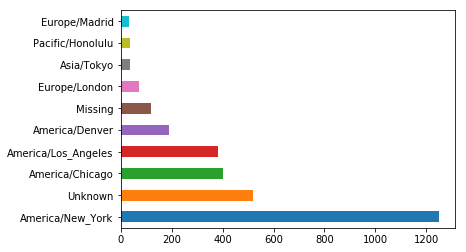

In [52]:
%matplotlib inline
tz_counts[:10].plot(kind='barh')

In [65]:
results=Series([x.split()[0] for x in frame.a.dropna()]) # a컬럼에서 nan을 뺀 값을 x에 저장한다

# frame의 a컬럼의 값이 nan인 행을 제외한 다음,
# frame의 a컬럼의 값을 x에게 대입
# x에 저장된 문자열을 공백으로 구분
# 구분된 문자열의 0번 인덱스 값을 추출하여 리스트의 요소로 해라
# 리스트을 시리즈 함수의 인수로 전달하여 시리즈 객체를 생성해라


result

0                  Mozilla/5.0
1       GoogleMaps/RochesterNY
2                  Mozilla/4.0
3                  Mozilla/5.0
4                  Mozilla/5.0
5                  Mozilla/5.0
6                  Mozilla/5.0
7                  Mozilla/5.0
8                   Opera/9.80
9                  Mozilla/5.0
10                 Mozilla/5.0
11                 Mozilla/5.0
12                 Mozilla/5.0
13                 Mozilla/5.0
14                 Mozilla/5.0
15                 Mozilla/5.0
16                 Mozilla/5.0
17      GoogleMaps/RochesterNY
18                 Mozilla/5.0
19                 Mozilla/5.0
20                 Mozilla/5.0
21                 Mozilla/4.0
22                 Mozilla/5.0
23                 Mozilla/5.0
24                 Mozilla/5.0
25                 Mozilla/5.0
26                 Mozilla/5.0
27                 Mozilla/5.0
28                 Mozilla/5.0
29                 Mozilla/5.0
                 ...          
3410               Mozilla/5.0
3411    

In [66]:
results.value_counts()[:8] # 상위 8개 추출

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [69]:
cframe=frame[frame.a.notnull()] # NaN을 제외한 나머지(a컬럼이 NaN인 것을 제외한 것)
len(cframe)

3440

In [75]:
type(cframe)

# a컬럼에 'Windows'가 있는지 조사하고 싶다 -> 
# 'Windows' 단어가 있으면 전체 문자열을 'Windows'로 치환, 없으면 'not Windows'로 치환
# (원하는 단어가 있으면 전체를 그 단어로 바꿔버리는 방식)

# contains 함수 : 해당 문자가 있는지 없는지 판단하는 함수
# np.where 함수 : np.where(조건, 참, 거짓)
import numpy as np
o_s=np.where(cframe['a'].str.contains("Windows"),"Windows","Not WIndows")
o_s[:5]

# -> 하나의 o_s 라는 배열이 만들어짐

array(['Windows', 'Not WIndows', 'Windows', 'Not WIndows', 'Windows'],
      dtype='<U11')

In [77]:
cframe['tz']

0          America/New_York
1            America/Denver
2          America/New_York
3         America/Sao_Paulo
4          America/New_York
5          America/New_York
6             Europe/Warsaw
7                          
8                          
9                          
10      America/Los_Angeles
11         America/New_York
12         America/New_York
14         America/New_York
15           Asia/Hong_Kong
16           Asia/Hong_Kong
17         America/New_York
18           America/Denver
19              Europe/Rome
20             Africa/Ceuta
21         America/New_York
22         America/New_York
23         America/New_York
24            Europe/Madrid
25        Asia/Kuala_Lumpur
26             Asia/Nicosia
27        America/Sao_Paulo
28                         
29                         
30            Europe/London
               ...         
3529       America/New_York
3530    America/Los_Angeles
3531                       
3532       America/New_York
3533       America/N

In [86]:
by_tx_os=cframe.groupby(['tz',o_s])

# by_tx_os.size() # size : 그룹별 합계를 구하는 함수
agg_counts=by_tx_os.size().unstack().fillna(0)
agg_counts[:10]

,Not WIndows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [92]:
# agg_counts.sum(axis=0) # defalut는 axis=0(행) / axis=1(열)
indexer=agg_counts.sum(axis=1).argsort()# argsort : 오름차순 정렬했을 때의 순서 
indexer[:10]
indexer[-10:]

tz
Europe/Sofia        35
Europe/Stockholm    78
Europe/Uzhgorod     96
Europe/Vienna       59
Europe/Vilnius      77
Europe/Volgograd    15
Europe/Warsaw       22
Europe/Zurich       12
Pacific/Auckland     0
Pacific/Honolulu    29
dtype: int64

In [96]:
count_subset=agg_counts.take(indexer)[-10:]
# agg_counts에 take를 적용해서 행을 정렬된 순서 그대로 선택하고 마지막 10개 행만 잘라낸다
# argsort한 결과가 indexer에 들어가 있다

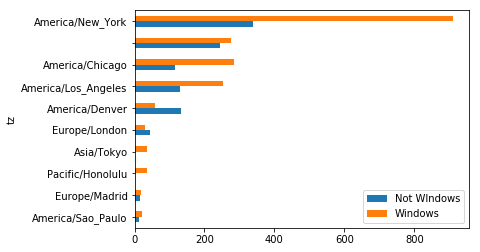

In [97]:
# 시각화 하기
count_subset.plot(kind='barh')

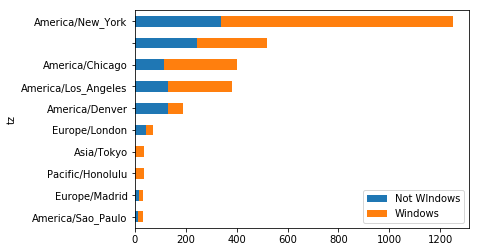

In [98]:
# 누적 그래프 추출하기 (stacked : 중첩 막대그래프)
count_subset.plot(kind='barh',stacked=True)

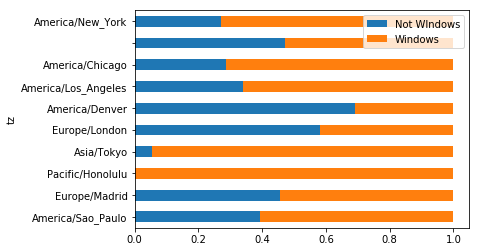

In [100]:
# 상대 비율을 확인하기 어려움으로 각 행의 총합을 정규화한 다음 비교
normed_subset=count_subset.div(count_subset.sum(1),axis=0)
normed_subset.plot(kind='barh',stacked=True)